<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/ml/ml_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML PCA

In [36]:
url_origem = "https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/aprendizado_maquina/"
arquivo_origem ="liquens.xls"

!wget $url_origem$arquivo_origem -O $arquivo_origem

--2022-12-09 14:03:56--  https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/aprendizado_maquina/liquens.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32768 (32K) [application/octet-stream]
Saving to: ‘liquens.xls’

liquens.xls         100%[===================>]  32.00K  --.-KB/s    in 0.002s  

2022-12-09 14:03:56 (13.1 MB/s) - ‘liquens.xls’ saved [32768/32768]



In [37]:
#!pip install --upgrade pandas
# workaround para tratar erro de versão de biblioteca: reinstalar xlrd e reiniciar runtime.
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [38]:
import pandas as pd

df = pd.read_excel(arquivo_origem)
df_numbers = df.iloc[2:,2:]
df_numbers = df_numbers.replace("<LD",0)
df_numbers


,Naftaleno,Acenaftileno,Acenafteno,Fluoreno,Fenantreno,Antraceno,Fluoranteno,Pireno,Benzo(a)antraceno,Criseno,Benzo(b)fluoranteno,Benzo(k)fluoranteno,Benzo(a)pireno,"Dibenzo(a,h)antraceno","Indeno(c,d)pireno","Benzo(g,h,i)perileno"
2,26.203659,3.654878,5.964634,7.803659,62.476829,2.967073,31.957317,40.851220,8.591463,45.543902,12.347561,4.247401,2.386585,2.336585,0.000000,2.335366
3,28.298780,4.281707,4.864634,10.040244,66.737805,3.437805,33.857317,33.582927,6.996341,44.637805,45.415854,18.984146,9.834146,9.107317,8.220732,12.620732
4,103.401220,11.537805,28.054878,41.439024,289.692683,15.750000,73.759756,99.756098,13.452439,58.886585,18.840244,7.002806,1.909756,3.113415,3.200000,1.580488
5,93.410976,6.452439,25.158537,42.986585,238.800000,13.689024,54.003659,87.774390,15.171951,58.020732,41.880488,14.386176,3.987805,2.886585,3.854878,3.525610
6,82.837805,5.485366,46.510976,36.237805,403.356098,16.369512,120.854878,129.768293,5.584146,56.192683,20.239024,3.387412,2.513415,3.220732,3.340244,2.113415
7,79.382927,4.593902,31.298780,30.828049,355.118293,15.756098,91.154878,102.157231,5.736585,54.229268,18.550000,-4.443755,2.297561,2.985366,2.998780,2.331707
8,80.358537,1.891463,82.209756,78.760976,454.341463,13.300000,174.810976,131.676829,16.357317,93.015854,34.046341,15.563858,2.215854,4.412195,7.674390,4.491463
9,87.804878,41.463415,32.926829,171.951220,612.195122,45.121951,254.878049,220.731707,59.756098,273.170732,42.682927,46.341463,40.243902,34.146341,29.268293,25.609756
10,129.037805,3.285366,23.879268,9.551220,43.301220,2.515854,14.407317,14.206098,1.676829,13.282927,2.297561,0.767836,1.170732,0.775610,0.930488,1.024390
11,103.442683,6.340244,6.634146,20.118293,84.396341,3.580488,25.491463,16.591463,6.970732,47.386585,13.107317,4.732927,1.262195,1.314634,2.229268,0.630488


In [39]:
from sklearn.preprocessing import StandardScaler

Xa = StandardScaler().fit_transform(df_numbers)
Xa.shape

(46, 16)

In [40]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=6)
pca.fit(Xa)  
print(pca.explained_variance_ratio_) 
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_) 

[0.59583908 0.19583616 0.05633117 0.05138681 0.02733901 0.0228619 ]
[0.59583908 0.79167524 0.84800641 0.89939322 0.92673224 0.94959414]
[20.94128845 12.00564092  6.43892412  6.14985302  4.48570117  4.10199471]


In [41]:
L= pca.components_.T
L

array([[ 0.1352996 ,  0.31760401,  0.52717799, -0.49661342,  0.17476591,
        -0.01924568],
       [ 0.23996767,  0.31671389,  0.03395867, -0.04550072, -0.27773642,
         0.31278332],
       [ 0.18767923,  0.38709904, -0.27223383,  0.13776092, -0.28597033,
        -0.24991213],
       [ 0.21382989,  0.34509931, -0.03791214,  0.1607365 , -0.36276861,
         0.4548631 ],
       [ 0.2800459 ,  0.16740623, -0.29323801,  0.12420829,  0.31481634,
        -0.15630377],
       [ 0.30488644, -0.01790548, -0.14347975,  0.08585339,  0.26122633,
         0.03145407],
       [ 0.28715744,  0.16849647, -0.14903883,  0.18557791,  0.11573974,
        -0.24780761],
       [ 0.24938849,  0.26984562,  0.18870204, -0.28687913,  0.23468104,
        -0.07599588],
       [ 0.27550348, -0.08297256,  0.00274759,  0.03058653,  0.37174885,
         0.2680649 ],
       [ 0.29420843, -0.17635007, -0.05931081,  0.10035643,  0.17655148,
        -0.05319773],
       [ 0.24343735, -0.25355531, -0.2605534 , -0.

In [42]:
T = pca.transform(Xa)
T

array([[-2.42296079e+00, -3.98045233e-01, -3.40931945e-01,
        -1.58211693e-01,  6.67825259e-03, -1.63697195e-01],
       [-7.12926342e-01, -1.91774332e+00,  6.77930188e-01,
         5.91652856e-02, -1.09163913e+00, -6.45650326e-01],
       [-5.19623656e-01,  5.95704745e-01, -1.36634779e-01,
        -1.02566942e-01,  8.82213948e-01, -3.04707814e-02],
       [-3.78227939e-01, -1.75991259e-01, -2.40060446e-01,
        -4.92018207e-01,  5.38008183e-01, -9.15424390e-03],
       [-3.25274079e-01,  8.69875371e-01, -5.68201335e-01,
         2.25701659e-01,  9.70657853e-01, -8.29312845e-01],
       [-8.77890489e-01,  7.10303305e-01, -3.53683425e-01,
         2.37824515e-01,  9.27707003e-01, -8.33871903e-01],
       [ 1.17001817e+00,  6.50469648e-01, -6.47895492e-01,
         8.45134084e-01,  8.59947988e-01, -7.68320792e-01],
       [ 9.80250229e+00, -2.60098623e+00,  2.40333756e+00,
         3.28557452e+00,  4.83646479e-01,  6.59788321e-01],
       [-2.90584687e+00,  4.72799865e-01,  5.425

In [43]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=T[:,0],y=T[:,1], color = df.iloc[2:,1])
fig.update_layout(title='Gŕafico de escores',
                  xaxis_title = 'PC1',
                  yaxis_title = 'PC2')

fig.update_traces(textposition='top center',marker={"size":6})

fig.add_trace(go.Scatter(x = [0,0,0,0,0],y = [-6,-3,1,4,7], mode="lines", name = "PC1 = 0"))

fig.show()

In [44]:
fig = px.scatter(x=L[:,0],y=L[:,1], text = df_numbers.columns)
fig.update_layout(title='Gŕafico de pesos (loadings)',
                  xaxis_title = 'PC1',
                  yaxis_title = 'PC2')

fig.update_traces(textposition='top center',marker={"size":6})

fig.show()


Dataset de flavonóides.

In [45]:
url_origem = "https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/"
arquivo_origem ="flavonoides.csv"

!wget $url_origem$arquivo_origem -O $arquivo_origem

--2022-12-09 14:04:01--  https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/flavonoides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111581 (109K) [text/plain]
Saving to: ‘flavonoides.csv’

flavonoides.csv     100%[===================>] 108.97K  --.-KB/s    in 0.02s   

2022-12-09 14:04:02 (6.17 MB/s) - ‘flavonoides.csv’ saved [111581/111581]



In [46]:
import pandas as pd
df_flav = pd.read_csv(arquivo_origem,sep='\t',index_col=0)
df_flav.shape


(20, 556)

In [47]:
X = df_flav.iloc[:,:-1]
y = df_flav.iloc[:,-1]
y


mol1    -0.643453
mol2     0.698970
mol3    -0.544068
mol4    -0.954243
mol5     0.000000
mol6     1.000000
mol7    -0.380211
mol8     0.522879
mol9    -0.908485
mol10   -1.033424
mol11    0.537602
mol12   -0.380211
mol13    0.537602
mol14   -0.857332
mol15    0.096910
mol16   -0.977724
mol17    0.154902
mol18    0.221849
mol19   -0.113943
mol20    0.096910
Name: Log (1/ID50), dtype: float64

In [48]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=6)
Xa = StandardScaler().fit_transform(X)
pca.fit(Xa)
T = pca.fit_transform(Xa)
T

array([[-2.33263088e+01,  1.31271284e+01, -7.75511834e+00,
         1.27236709e+00, -9.40431866e-01, -1.55183534e-01],
       [-1.73341727e+01,  4.43532321e+00, -6.29750954e+00,
        -1.57844099e+00,  1.86031791e+00, -4.08058779e+00],
       [-1.81959718e+01,  4.22120672e+00, -3.60525473e+00,
        -3.75123926e+00, -2.58492827e+00, -1.30582230e+00],
       [-1.46482991e+01,  9.16063912e+00, -2.82348965e-01,
        -1.72099949e+00, -5.42223048e+00,  8.21621273e-01],
       [-5.22479795e+00,  6.76382865e+00,  8.55089016e+00,
        -2.40543941e+00, -3.79867025e+00, -1.25954329e+00],
       [ 2.94281201e+00,  6.90311816e+00,  1.35180946e+01,
        -2.93994118e+00, -3.37940836e+00, -3.09316428e+00],
       [ 2.64062802e+01,  2.88556630e+00, -9.94392596e-01,
        -7.65780749e+00,  5.14546832e+00, -5.25251208e+00],
       [-5.32243903e+00, -8.47441158e+00, -5.82216608e-01,
        -3.68771532e+00, -1.65776015e+00, -9.72385118e-01],
       [ 2.96109735e+01,  3.85035019e-01, -1.970

In [49]:
import plotly.express as px
fig = px.scatter(x=T[:,0],y=T[:,1],text = df_flav.index)
fig.update_layout(title='Gŕafico de scores',
                  xaxis_title = 'PC1',
                  yaxis_title = 'PC2')

fig.update_traces(textposition='top center',marker={"size":6})

fig.show()

In [50]:
import plotly.express as px
dados = pd.DataFrame(T)
dados.columns = ["PC"+str(i+1) for i in range(dados.shape[1])]
fig = px.scatter_3d(dados, x="PC1", y="PC2", z="PC3",color=y.values, hover_data = [df_flav.index])
fig.show()


In [51]:
fig = px.scatter_matrix(dados, dimensions=["PC1", "PC2", "PC3", "PC4"], color=y.values)
fig.update_traces(text = df_flav.index)
fig.show()

In [52]:
T.mean(axis=0)

array([-7.93809463e-16,  1.50990331e-15,  3.33066907e-16,  0.00000000e+00,
       -5.99520433e-16,  7.10542736e-16])

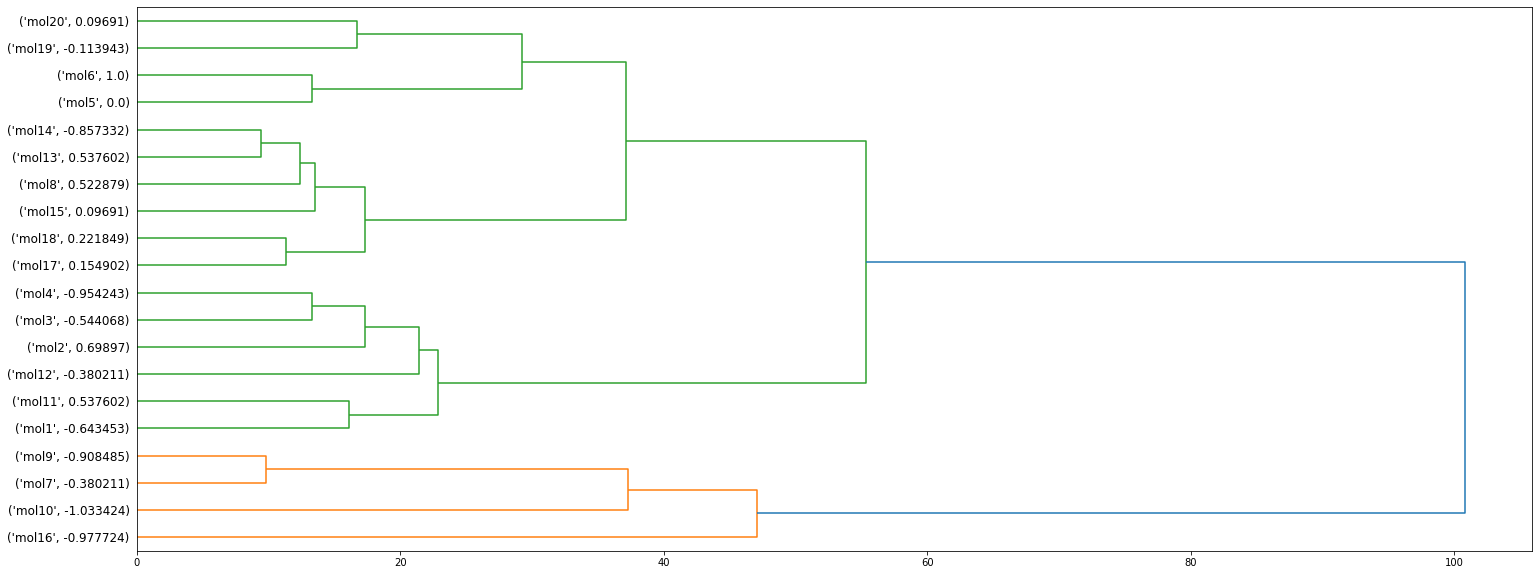

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(Xa,'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,orientation="right", labels=[(df_flav.index[i],y[i]) for i in range(len(y))])
